In [1]:
import cv2
import os
import skimage
from skimage import data
from skimage import transform
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint
import tensorflow as tf
from scipy import ndimage, misc

HEIGHT=16
WIDTH=8
CLASSNUMBER = 32
RESIZED_HEIGHT = 80
RESIZED_WIDTH = 40
TRAIN_CLASS_NUMBER =55



/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:

def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) if f.endswith(".jpg")]
        for f in file_names:
            
            images.append(skimage.data.imread(f))
            labels.append(str(d))
    return images, labels

In [3]:
ROOT_PATH = '/home/tang/targa/exp3/'
load_train_data_directory = os.path.join(ROOT_PATH, "16_8_1248_train")
load_test_data_directory = os.path.join(ROOT_PATH, "16_8_1248_validation")
train_data_directory = os.path.join(ROOT_PATH, "padding80_40/train")
test_data_directory = os.path.join(ROOT_PATH, "padding80_40/test")

In [4]:
trainImages,trainLabels = load_data(load_train_data_directory)
testImages,testLabels = load_data(load_test_data_directory)

In [5]:
print('train images length:\t\t{}'.format(len(trainImages)))

print('test images length:\t\t{}'.format(len(testImages)))



train images length:		1246
test images length:		411


In [6]:
from PIL import Image, ImageOps

top, bottom = [int((RESIZED_HEIGHT-HEIGHT)/2)]*2
left, right = [int((RESIZED_WIDTH-WIDTH)/2)]*2

color = [0,0,0]


In [7]:
i=0
for p in range(0,len(trainImages)):
    
    img = trainImages[i]
    img_with_border = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    
    
    filename=train_data_directory+ '/' + trainLabels[i] + '/' + trainLabels[i]+str(i)+'.jpg'
    plt.imsave(filename, img_with_border)
    print(filename)
    i+=1

/home/tang/targa/exp3/padding80_40/train/J/J0.jpg
/home/tang/targa/exp3/padding80_40/train/J/J1.jpg
/home/tang/targa/exp3/padding80_40/train/J/J2.jpg
/home/tang/targa/exp3/padding80_40/train/J/J3.jpg
/home/tang/targa/exp3/padding80_40/train/J/J4.jpg
/home/tang/targa/exp3/padding80_40/train/J/J5.jpg
/home/tang/targa/exp3/padding80_40/train/J/J6.jpg
/home/tang/targa/exp3/padding80_40/train/J/J7.jpg
/home/tang/targa/exp3/padding80_40/train/J/J8.jpg
/home/tang/targa/exp3/padding80_40/train/J/J9.jpg
/home/tang/targa/exp3/padding80_40/train/J/J10.jpg
/home/tang/targa/exp3/padding80_40/train/J/J11.jpg
/home/tang/targa/exp3/padding80_40/train/J/J12.jpg
/home/tang/targa/exp3/padding80_40/train/J/J13.jpg
/home/tang/targa/exp3/padding80_40/train/J/J14.jpg
/home/tang/targa/exp3/padding80_40/train/J/J15.jpg
/home/tang/targa/exp3/padding80_40/train/J/J16.jpg
/home/tang/targa/exp3/padding80_40/train/J/J17.jpg
/home/tang/targa/exp3/padding80_40/train/J/J18.jpg
/home/tang/targa/exp3/padding80_40/train/

/home/tang/targa/exp3/padding80_40/train/L/L246.jpg
/home/tang/targa/exp3/padding80_40/train/L/L247.jpg
/home/tang/targa/exp3/padding80_40/train/L/L248.jpg
/home/tang/targa/exp3/padding80_40/train/L/L249.jpg
/home/tang/targa/exp3/padding80_40/train/L/L250.jpg
/home/tang/targa/exp3/padding80_40/train/L/L251.jpg
/home/tang/targa/exp3/padding80_40/train/L/L252.jpg
/home/tang/targa/exp3/padding80_40/train/L/L253.jpg
/home/tang/targa/exp3/padding80_40/train/L/L254.jpg
/home/tang/targa/exp3/padding80_40/train/L/L255.jpg
/home/tang/targa/exp3/padding80_40/train/L/L256.jpg
/home/tang/targa/exp3/padding80_40/train/L/L257.jpg
/home/tang/targa/exp3/padding80_40/train/L/L258.jpg
/home/tang/targa/exp3/padding80_40/train/L/L259.jpg
/home/tang/targa/exp3/padding80_40/train/L/L260.jpg
/home/tang/targa/exp3/padding80_40/train/L/L261.jpg
/home/tang/targa/exp3/padding80_40/train/L/L262.jpg
/home/tang/targa/exp3/padding80_40/train/L/L263.jpg
/home/tang/targa/exp3/padding80_40/train/L/L264.jpg
/home/tang/t

/home/tang/targa/exp3/padding80_40/train/C/C436.jpg
/home/tang/targa/exp3/padding80_40/train/C/C437.jpg
/home/tang/targa/exp3/padding80_40/train/C/C438.jpg
/home/tang/targa/exp3/padding80_40/train/C/C439.jpg
/home/tang/targa/exp3/padding80_40/train/C/C440.jpg
/home/tang/targa/exp3/padding80_40/train/C/C441.jpg
/home/tang/targa/exp3/padding80_40/train/C/C442.jpg
/home/tang/targa/exp3/padding80_40/train/C/C443.jpg
/home/tang/targa/exp3/padding80_40/train/C/C444.jpg
/home/tang/targa/exp3/padding80_40/train/C/C445.jpg
/home/tang/targa/exp3/padding80_40/train/C/C446.jpg
/home/tang/targa/exp3/padding80_40/train/C/C447.jpg
/home/tang/targa/exp3/padding80_40/train/C/C448.jpg
/home/tang/targa/exp3/padding80_40/train/C/C449.jpg
/home/tang/targa/exp3/padding80_40/train/C/C450.jpg
/home/tang/targa/exp3/padding80_40/train/C/C451.jpg
/home/tang/targa/exp3/padding80_40/train/C/C452.jpg
/home/tang/targa/exp3/padding80_40/train/C/C453.jpg
/home/tang/targa/exp3/padding80_40/train/C/C454.jpg
/home/tang/t

/home/tang/targa/exp3/padding80_40/train/Y/Y624.jpg
/home/tang/targa/exp3/padding80_40/train/Y/Y625.jpg
/home/tang/targa/exp3/padding80_40/train/Y/Y626.jpg
/home/tang/targa/exp3/padding80_40/train/Y/Y627.jpg
/home/tang/targa/exp3/padding80_40/train/Y/Y628.jpg
/home/tang/targa/exp3/padding80_40/train/Y/Y629.jpg
/home/tang/targa/exp3/padding80_40/train/Y/Y630.jpg
/home/tang/targa/exp3/padding80_40/train/Y/Y631.jpg
/home/tang/targa/exp3/padding80_40/train/Y/Y632.jpg
/home/tang/targa/exp3/padding80_40/train/Y/Y633.jpg
/home/tang/targa/exp3/padding80_40/train/Y/Y634.jpg
/home/tang/targa/exp3/padding80_40/train/Y/Y635.jpg
/home/tang/targa/exp3/padding80_40/train/Y/Y636.jpg
/home/tang/targa/exp3/padding80_40/train/Y/Y637.jpg
/home/tang/targa/exp3/padding80_40/train/Y/Y638.jpg
/home/tang/targa/exp3/padding80_40/train/Y/Y639.jpg
/home/tang/targa/exp3/padding80_40/train/Y/Y640.jpg
/home/tang/targa/exp3/padding80_40/train/Y/Y641.jpg
/home/tang/targa/exp3/padding80_40/train/Y/Y642.jpg
/home/tang/t

/home/tang/targa/exp3/padding80_40/train/R/R800.jpg
/home/tang/targa/exp3/padding80_40/train/R/R801.jpg
/home/tang/targa/exp3/padding80_40/train/R/R802.jpg
/home/tang/targa/exp3/padding80_40/train/R/R803.jpg
/home/tang/targa/exp3/padding80_40/train/R/R804.jpg
/home/tang/targa/exp3/padding80_40/train/R/R805.jpg
/home/tang/targa/exp3/padding80_40/train/R/R806.jpg
/home/tang/targa/exp3/padding80_40/train/R/R807.jpg
/home/tang/targa/exp3/padding80_40/train/R/R808.jpg
/home/tang/targa/exp3/padding80_40/train/R/R809.jpg
/home/tang/targa/exp3/padding80_40/train/R/R810.jpg
/home/tang/targa/exp3/padding80_40/train/R/R811.jpg
/home/tang/targa/exp3/padding80_40/train/R/R812.jpg
/home/tang/targa/exp3/padding80_40/train/R/R813.jpg
/home/tang/targa/exp3/padding80_40/train/R/R814.jpg
/home/tang/targa/exp3/padding80_40/train/R/R815.jpg
/home/tang/targa/exp3/padding80_40/train/R/R816.jpg
/home/tang/targa/exp3/padding80_40/train/5/5817.jpg
/home/tang/targa/exp3/padding80_40/train/5/5818.jpg
/home/tang/t

/home/tang/targa/exp3/padding80_40/train/0/0990.jpg
/home/tang/targa/exp3/padding80_40/train/0/0991.jpg
/home/tang/targa/exp3/padding80_40/train/0/0992.jpg
/home/tang/targa/exp3/padding80_40/train/0/0993.jpg
/home/tang/targa/exp3/padding80_40/train/0/0994.jpg
/home/tang/targa/exp3/padding80_40/train/0/0995.jpg
/home/tang/targa/exp3/padding80_40/train/0/0996.jpg
/home/tang/targa/exp3/padding80_40/train/0/0997.jpg
/home/tang/targa/exp3/padding80_40/train/0/0998.jpg
/home/tang/targa/exp3/padding80_40/train/0/0999.jpg
/home/tang/targa/exp3/padding80_40/train/0/01000.jpg
/home/tang/targa/exp3/padding80_40/train/0/01001.jpg
/home/tang/targa/exp3/padding80_40/train/0/01002.jpg
/home/tang/targa/exp3/padding80_40/train/0/01003.jpg
/home/tang/targa/exp3/padding80_40/train/0/01004.jpg
/home/tang/targa/exp3/padding80_40/train/0/01005.jpg
/home/tang/targa/exp3/padding80_40/train/0/01006.jpg
/home/tang/targa/exp3/padding80_40/train/0/01007.jpg
/home/tang/targa/exp3/padding80_40/train/0/01008.jpg
/ho

/home/tang/targa/exp3/padding80_40/train/2/21176.jpg
/home/tang/targa/exp3/padding80_40/train/2/21177.jpg
/home/tang/targa/exp3/padding80_40/train/2/21178.jpg
/home/tang/targa/exp3/padding80_40/train/2/21179.jpg
/home/tang/targa/exp3/padding80_40/train/2/21180.jpg
/home/tang/targa/exp3/padding80_40/train/2/21181.jpg
/home/tang/targa/exp3/padding80_40/train/2/21182.jpg
/home/tang/targa/exp3/padding80_40/train/2/21183.jpg
/home/tang/targa/exp3/padding80_40/train/2/21184.jpg
/home/tang/targa/exp3/padding80_40/train/2/21185.jpg
/home/tang/targa/exp3/padding80_40/train/2/21186.jpg
/home/tang/targa/exp3/padding80_40/train/2/21187.jpg
/home/tang/targa/exp3/padding80_40/train/2/21188.jpg
/home/tang/targa/exp3/padding80_40/train/2/21189.jpg
/home/tang/targa/exp3/padding80_40/train/2/21190.jpg
/home/tang/targa/exp3/padding80_40/train/2/21191.jpg
/home/tang/targa/exp3/padding80_40/train/2/21192.jpg
/home/tang/targa/exp3/padding80_40/train/2/21193.jpg
/home/tang/targa/exp3/padding80_40/train/2/211

In [8]:
img_with_border.shape

(80, 40, 3)

In [9]:
i=0
for p in range(0,len(testImages)):
    
    img = testImages[i]
    img_with_border = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    
    
    filename=test_data_directory+ '/' + testLabels[i] + '/' + testLabels[i]+str(i)+'.jpg'
    plt.imsave(filename, img_with_border)
    print(filename)
    i+=1

/home/tang/targa/exp3/padding80_40/test/J/J0.jpg
/home/tang/targa/exp3/padding80_40/test/J/J1.jpg
/home/tang/targa/exp3/padding80_40/test/J/J2.jpg
/home/tang/targa/exp3/padding80_40/test/J/J3.jpg
/home/tang/targa/exp3/padding80_40/test/J/J4.jpg
/home/tang/targa/exp3/padding80_40/test/J/J5.jpg
/home/tang/targa/exp3/padding80_40/test/J/J6.jpg
/home/tang/targa/exp3/padding80_40/test/J/J7.jpg
/home/tang/targa/exp3/padding80_40/test/J/J8.jpg
/home/tang/targa/exp3/padding80_40/test/J/J9.jpg
/home/tang/targa/exp3/padding80_40/test/J/J10.jpg
/home/tang/targa/exp3/padding80_40/test/J/J11.jpg
/home/tang/targa/exp3/padding80_40/test/E/E12.jpg
/home/tang/targa/exp3/padding80_40/test/E/E13.jpg
/home/tang/targa/exp3/padding80_40/test/E/E14.jpg
/home/tang/targa/exp3/padding80_40/test/E/E15.jpg
/home/tang/targa/exp3/padding80_40/test/E/E16.jpg
/home/tang/targa/exp3/padding80_40/test/E/E17.jpg
/home/tang/targa/exp3/padding80_40/test/E/E18.jpg
/home/tang/targa/exp3/padding80_40/test/E/E19.jpg
/home/tang

/home/tang/targa/exp3/padding80_40/test/W/W184.jpg
/home/tang/targa/exp3/padding80_40/test/W/W185.jpg
/home/tang/targa/exp3/padding80_40/test/W/W186.jpg
/home/tang/targa/exp3/padding80_40/test/W/W187.jpg
/home/tang/targa/exp3/padding80_40/test/W/W188.jpg
/home/tang/targa/exp3/padding80_40/test/W/W189.jpg
/home/tang/targa/exp3/padding80_40/test/W/W190.jpg
/home/tang/targa/exp3/padding80_40/test/W/W191.jpg
/home/tang/targa/exp3/padding80_40/test/W/W192.jpg
/home/tang/targa/exp3/padding80_40/test/W/W193.jpg
/home/tang/targa/exp3/padding80_40/test/W/W194.jpg
/home/tang/targa/exp3/padding80_40/test/9/9195.jpg
/home/tang/targa/exp3/padding80_40/test/9/9196.jpg
/home/tang/targa/exp3/padding80_40/test/9/9197.jpg
/home/tang/targa/exp3/padding80_40/test/9/9198.jpg
/home/tang/targa/exp3/padding80_40/test/9/9199.jpg
/home/tang/targa/exp3/padding80_40/test/9/9200.jpg
/home/tang/targa/exp3/padding80_40/test/9/9201.jpg
/home/tang/targa/exp3/padding80_40/test/9/9202.jpg
/home/tang/targa/exp3/padding80

/home/tang/targa/exp3/padding80_40/test/X/X369.jpg
/home/tang/targa/exp3/padding80_40/test/X/X370.jpg
/home/tang/targa/exp3/padding80_40/test/X/X371.jpg
/home/tang/targa/exp3/padding80_40/test/X/X372.jpg
/home/tang/targa/exp3/padding80_40/test/X/X373.jpg
/home/tang/targa/exp3/padding80_40/test/8/8374.jpg
/home/tang/targa/exp3/padding80_40/test/8/8375.jpg
/home/tang/targa/exp3/padding80_40/test/8/8376.jpg
/home/tang/targa/exp3/padding80_40/test/8/8377.jpg
/home/tang/targa/exp3/padding80_40/test/8/8378.jpg
/home/tang/targa/exp3/padding80_40/test/8/8379.jpg
/home/tang/targa/exp3/padding80_40/test/8/8380.jpg
/home/tang/targa/exp3/padding80_40/test/8/8381.jpg
/home/tang/targa/exp3/padding80_40/test/8/8382.jpg
/home/tang/targa/exp3/padding80_40/test/8/8383.jpg
/home/tang/targa/exp3/padding80_40/test/8/8384.jpg
/home/tang/targa/exp3/padding80_40/test/8/8385.jpg
/home/tang/targa/exp3/padding80_40/test/2/2386.jpg
/home/tang/targa/exp3/padding80_40/test/2/2387.jpg
/home/tang/targa/exp3/padding80

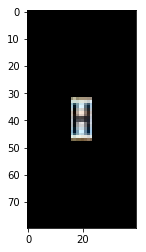

In [10]:
plt.imshow(img_with_border)

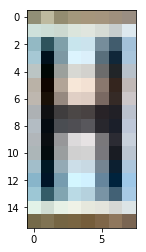

In [11]:
plt.imshow(img)